## Aim :

This project's main goal is to use machine learning-based methods like Gaussian Naive Bayes, Logistic Regression and Random Forest to identify 100% of fraudulent transactions while reducing the number of incorrect fraud classifications and to provide a comparative study for algorithm performance analysis.

### Steps Followed:

Used Exploratory Data Analysis and understand the data

Used visualisation to understand and preprocess the data

Preparing the data for modelling

Used Undersampling and Oversampling

Build the models: Gaussian Naive Bayes Algorithm, Logistic Regression and Random Forest

Evaluating model

### Import Libraries

In [4]:
import pandas as pd
import numpy as npy

import matplotlib.pyplot as plots
%matplotlib inline
import seaborn as seabplots

import warnings
warnings.filterwarnings('ignore')

# Understand the data using Exploratory Data Analysis

##  Reading and understand the credit card data from kaggle

In [5]:
# Downloaded the dataset from kaggle and added it to the folder.
# Reading the data for credit card from the folder 

ccdata = pd.read_csv('creditcard.csv')

# Ususally, if the creditcard_dataset set is big, it will take some time to load the data

In [6]:
# To check the number of rows and the number of columns in the creditcard_dataset

ccdata.shape

(284807, 31)

In [7]:
# Checking the first five rows in the dataset to check for the column names and values in creditcard_dataset

ccdata.head()

# Result: The data has confidential data of users which cannot be disclosed and the same has been PCA transformed - from V1 to V28
# Amount and Time has been provided
# Class is the response variable that shows if the transaction is fraud (1) or non-fraud (0).

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset has 31 columns and 284807 rows

In [8]:
#ccdata.info()

In [9]:
# To check for multiple statistical parameters for each column we can use

ccdata.describe()

# The result provide the perfect understanding of count mean std min max for the creditcard_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling Missing Values 

In [10]:
# Checking the presence of any missing values in the creditcard_dataset

ccdata.isnull().sum().sum()

0

We understood that there are zero missing values in the entire creditcard_dataset 

###  Checking the distribution of legit and fraud transactions

In [11]:
cc_classes = ccdata['Class'].value_counts()
cc_classes

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Calculating the percentage of normal non-fradulent entries

perct_legit = (cc_classes[0]/ccdata['Class'].count()*100)
perct_legit

99.82725143693798

In [13]:
# Percentage of fradulent transction

perct_fraudul = cc_classes[1]/ccdata['Class'].count()*100
perct_fraudul


0.1727485630620034

As we can see, 0.17% of the total transactions are fradulent. 

Only a small percentage of a company's transactions—sometimes as low as zero or even 0.01%—are fraudulent. There won't be much information available to figure out how to spot fraud if there aren't many occurrences of it. This is referred to as a "class imbalance," and it is one of the biggest obstacles to the identification of fraud.

Lets consider the solution for imbalance class in the later part 

###  Data Representations

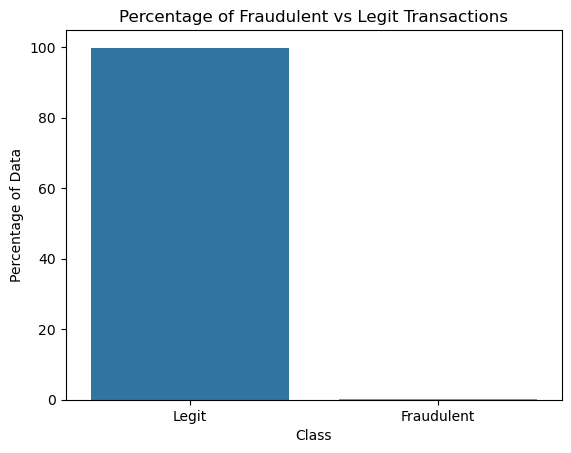

In [14]:

# Creating a Bar plot for the percent  of fraudulent vs the legit cases
fraudul_perc = {'Class':['Legit', 'Fraudulent'], 'Percentage of Data':[perct_legit, perct_fraudul]} 
ccdata_fraud_perc = pd.DataFrame(fraudul_perc) 
seabplots.barplot(x='Class',y='Percentage of Data', data=ccdata_fraud_perc)
plots.title('Percentage of Fraudulent vs Legit Transactions')

plots.show()


#### Outliers Treatment

For this specific dataset, we are not using any outliers treatment. Since all the columns have already undergone PCA transformation, it is presumed that the outlier values were taken into account when the data was being transformed.

#### Correlation with Class 

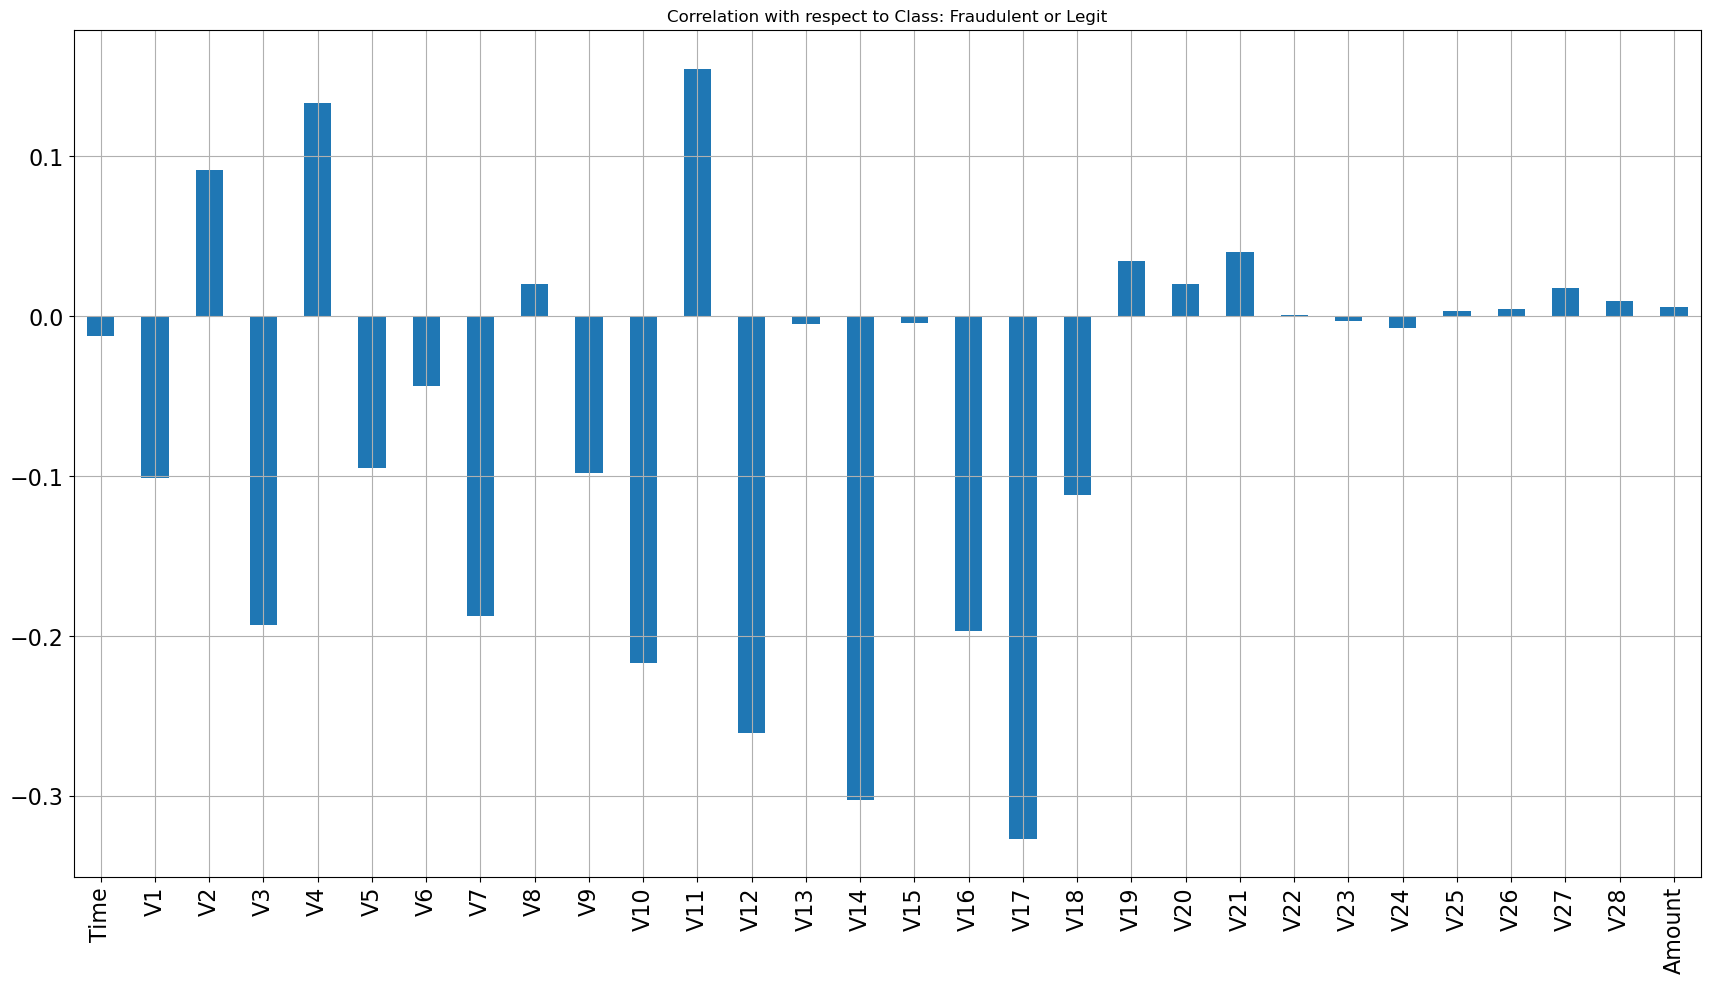

In [15]:
## Creating a linear Correlation bar plot with all the column variables

ccdata2 = ccdata.drop(columns = ['Class'])   # drop non numerical columns
ccdata3 = ccdata['Class']
ccdata2.corrwith(ccdata.Class).plot.bar(
        figsize = (21, 11), title = "Correlation with respect to Class: Fraudulent or Legit", fontsize = 16, grid = True)
plots.show()


In [16]:
#Dropping the column V22 as it has no correlation with the class


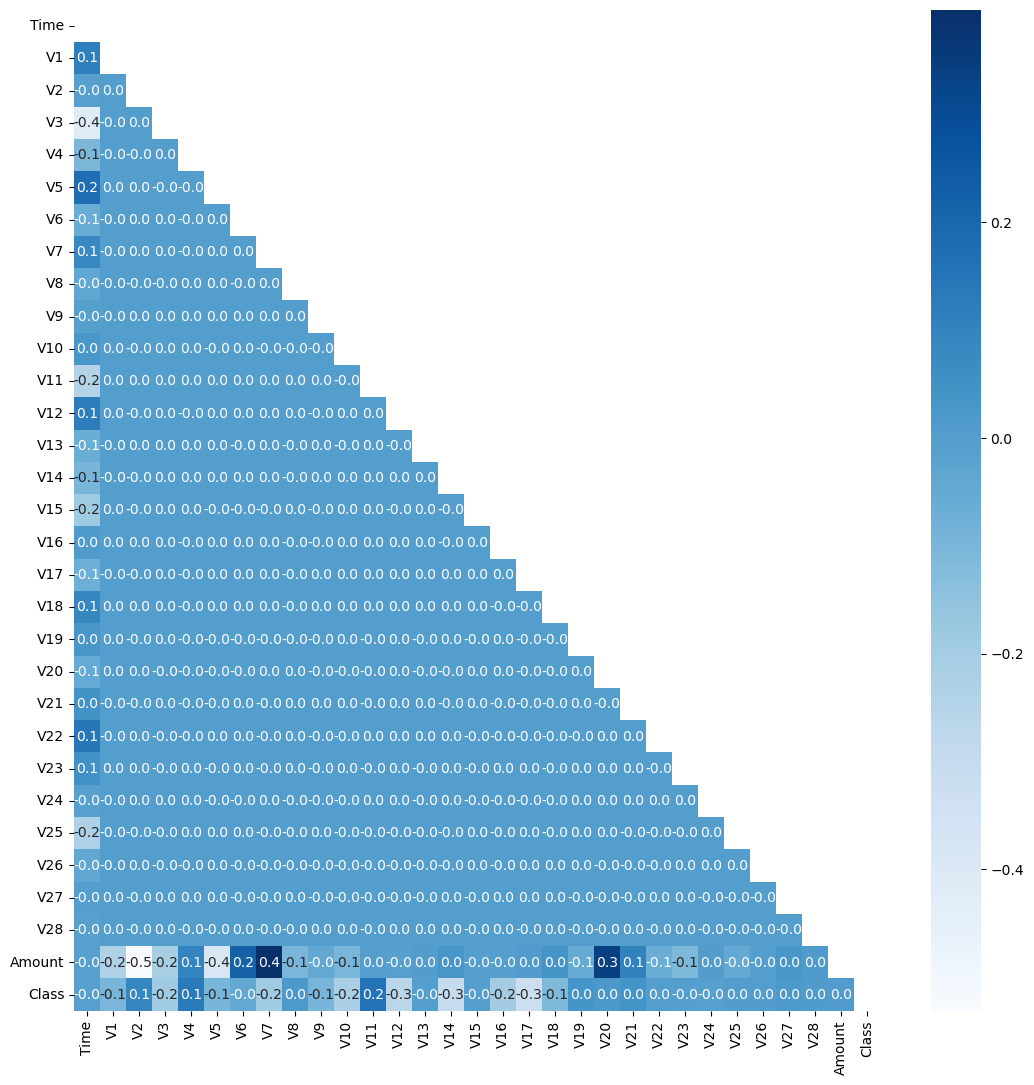

In [17]:

# creating mask
hide = npy.triu(npy.ones_like(ccdata.corr()))

plots.figure(figsize=(13,13))
correlations=ccdata.corr()
seabplots.heatmap(correlations,cbar=True, mask=hide,annot=True, annot_kws={"size":10}, fmt=".1f", cmap="Blues")
plots.show()

### Distribution of Classes with Time

In [18]:
# Creating legit transaction df
legits = ccdata[ccdata['Class'] == 1]
# Creating a fradulent transactiond df
frauds = ccdata[ccdata['Class'] == 0]

#### Plotting for legits and frauds 

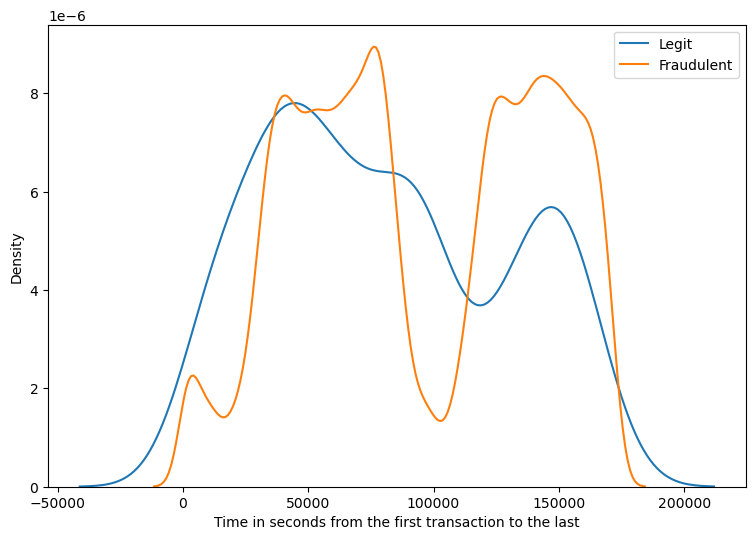

In [19]:

plots.figure(figsize=(9,6))
ax = seabplots.distplot(legits['Time'],label='Legit',hist=False)
ax = seabplots.distplot(frauds['Time'],label='Fraudulent',hist=False)
plots.legend(loc='upper right')
ax.set(xlabel='Time in seconds from the first transaction to the last')
plots.show()


### Plot of transactions in 2 days

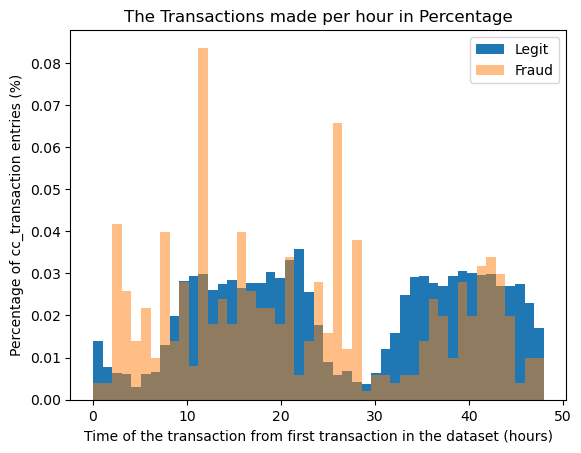

In [20]:

bins = npy.linspace(0, 48, 48) #48 hours

plots.hist((frauds.Time/(60*60)), bins,  density=True, label='Legit', alpha=1)
plots.hist((legits.Time/(60*60)), bins,  density=True, label='Fraud' ,alpha=0.5)
plots.legend(loc='upper right')
plots.title("The Transactions made per hour in Percentage")
plots.xlabel("Time of the transaction from first transaction in the dataset (hours)")
plots.ylabel("Percentage of cc_transaction entries (%)")
plots.show()

We understand that there is no specific pattern for the fraud and legit transactions with Time.

###  Plotting for amount distribution

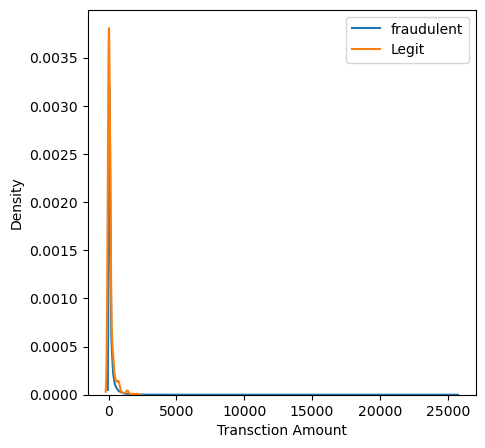

In [21]:

plots.figure(figsize=(5,5))
ax = seabplots.distplot(frauds['Amount'],label='fraudulent',hist=False)
ax = seabplots.distplot(legits['Amount'],label='Legit',hist=False)
plots.legend(loc='upper right')
ax.set(xlabel='Transction Amount')
plots.show()


#### Plot of high value transactions(10 to 500)

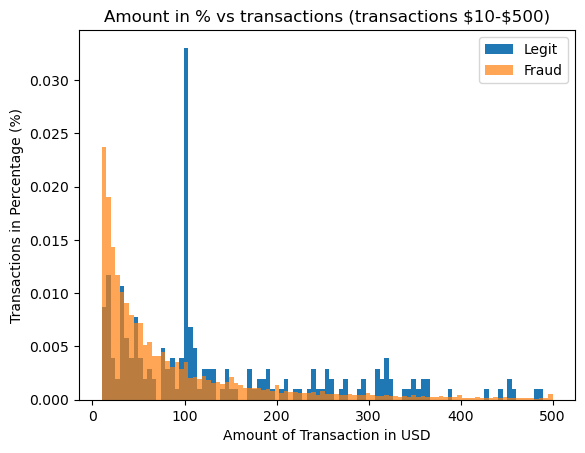

In [22]:
bins = npy.linspace(10, 500, 100)
plots.hist(legits['Amount'], bins, density=True, label='Legit', alpha=1)
plots.hist(frauds['Amount'], bins, density=True, label='Fraud', alpha=0.7)
plots.legend(loc='upper right')
plots.title("Amount in % vs transactions (transactions \$10-$500)")
plots.xlabel("Amount of Transaction in USD")
plots.ylabel("Transactions in Percentage (%)")
plots.show()

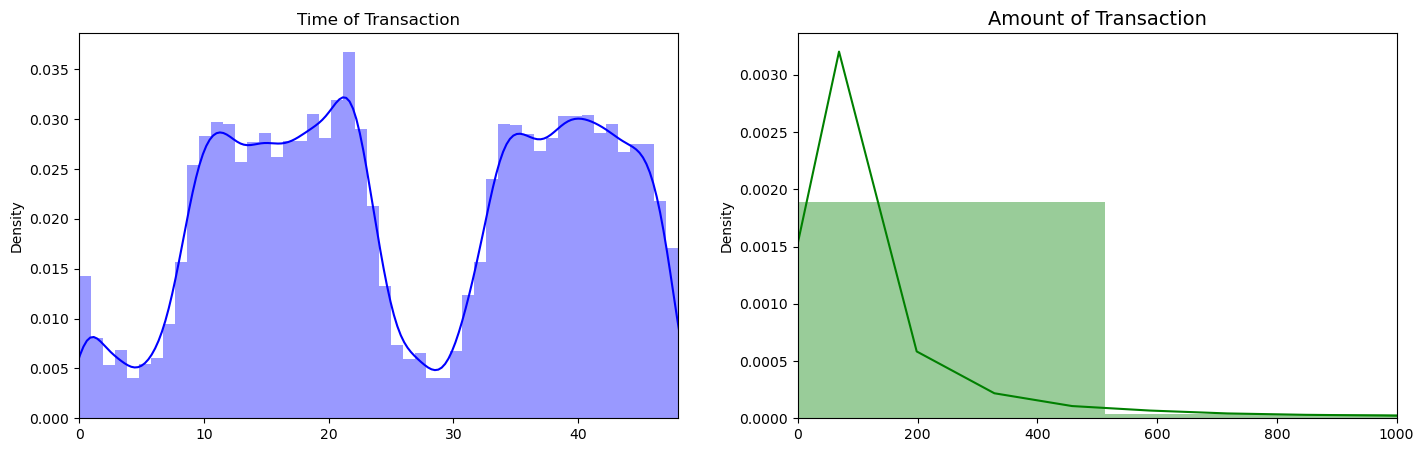

In [23]:
import seaborn as seabplots

fig, ax = plots.subplots(1, 2, figsize=(17,5))

# Plot the distribution of 'Time' feature 
seabplots.distplot(ccdata['Time'].values/(60*60), color='b', ax=ax[0])
ax[0].set_title('Time of Transaction', fontsize=12)
ax[0].set_xlim([min(ccdata['Time'].values/(60*60)), max(ccdata['Time'].values/(60*60))])

seabplots.distplot(ccdata['Amount'].values, ax=ax[1], color='g')
ax[1].set_title('Amount of Transaction', fontsize=14)
ax[1].set_xlim([min(ccdata['Amount'].values),1000])

plots.show()

####  Plotting Histograms for all columns

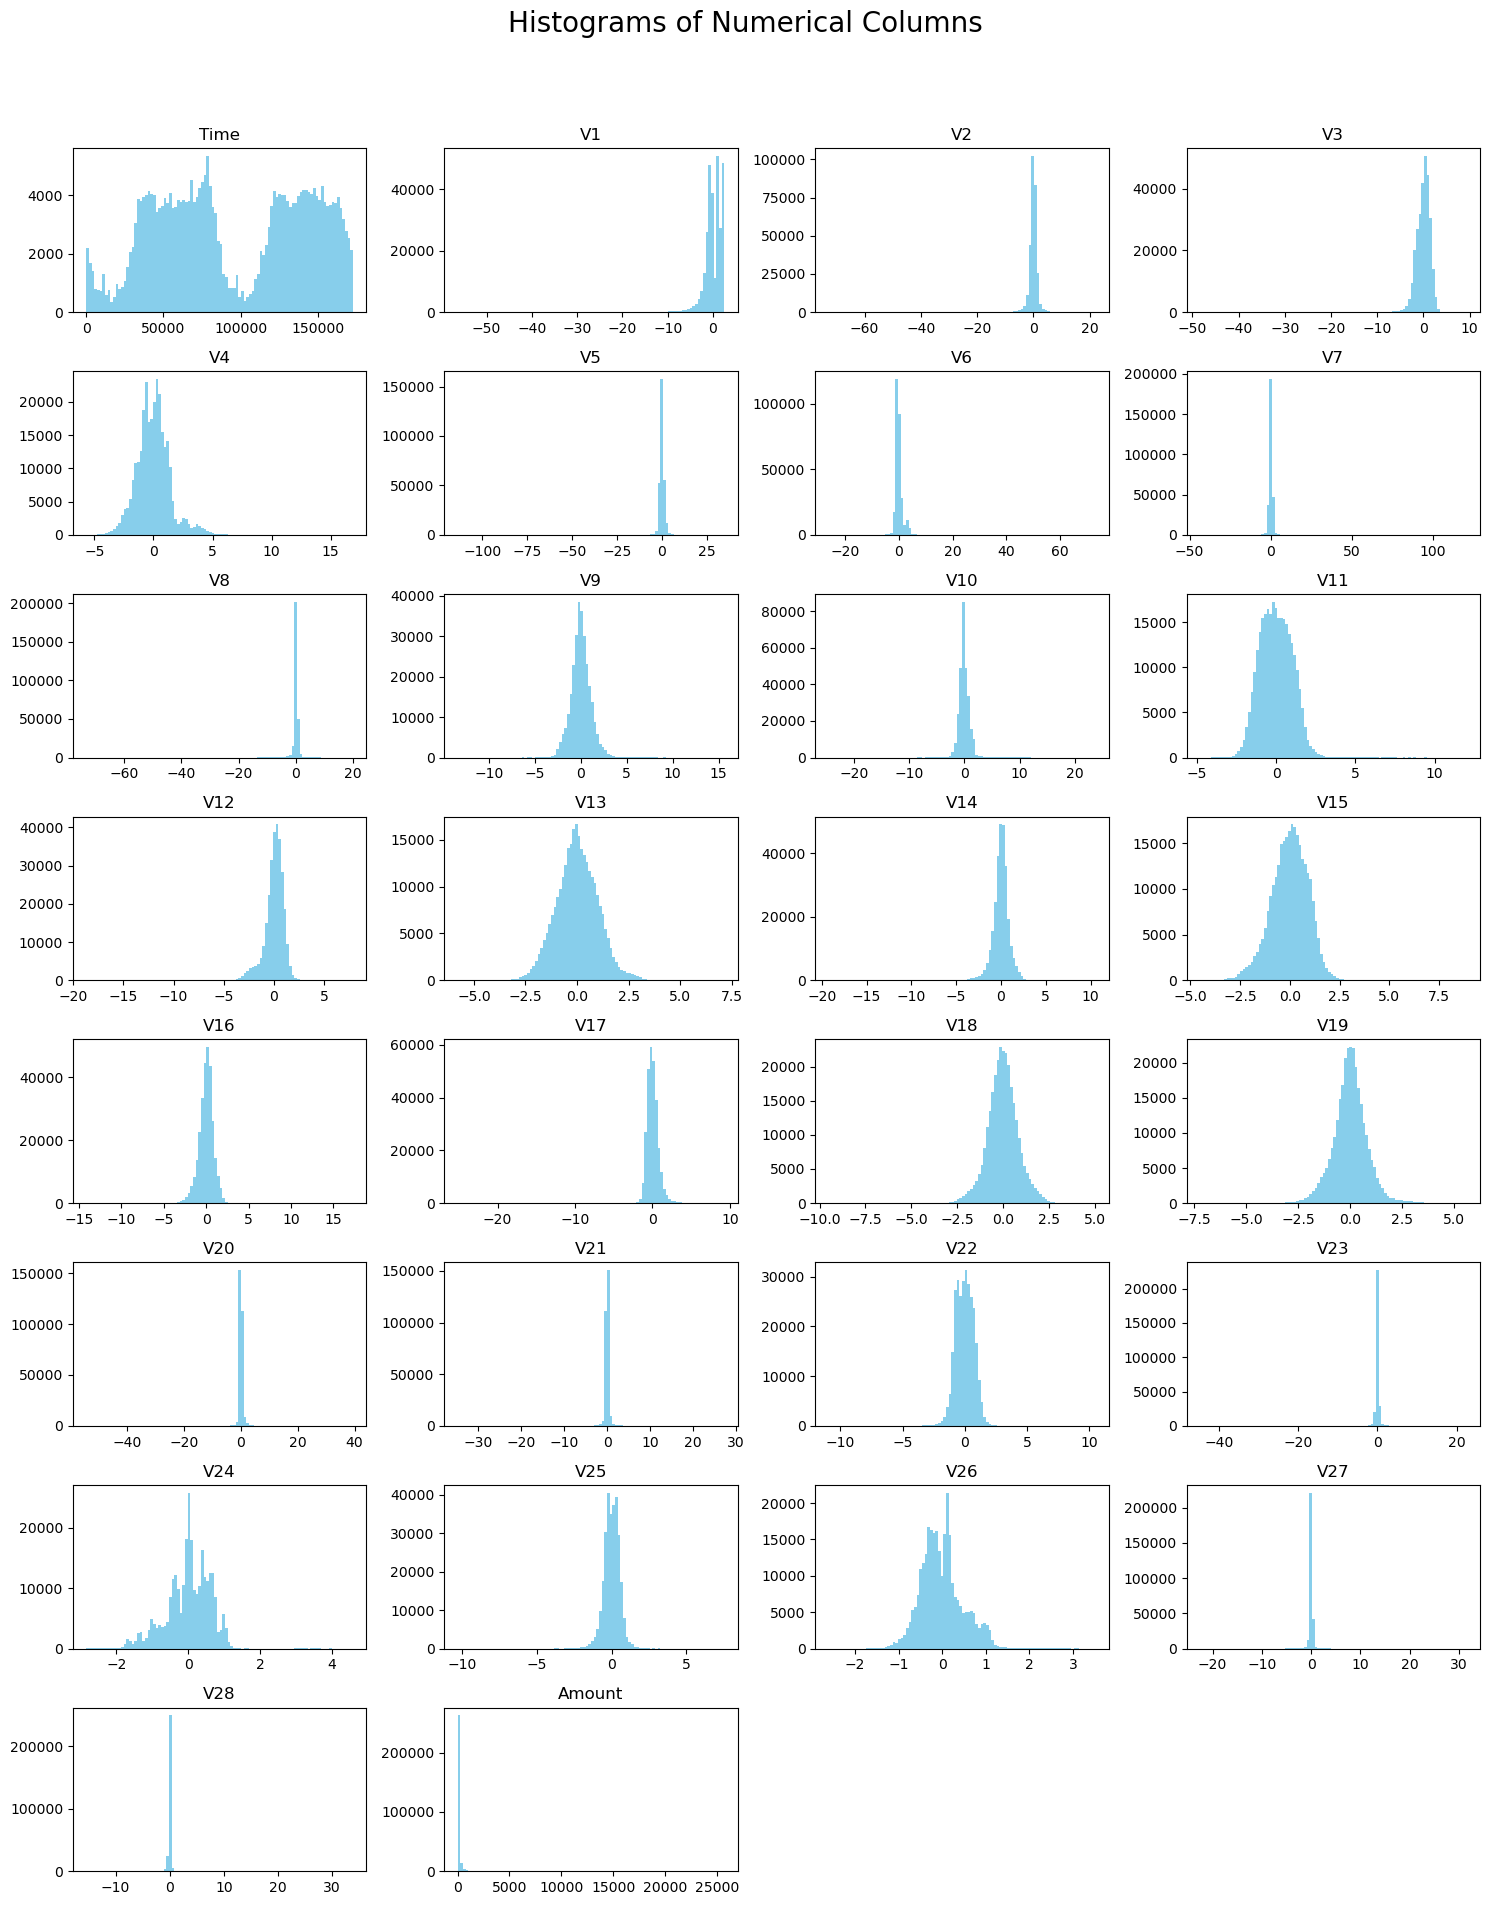

In [24]:
fig = plots.figure(figsize=(15, 20))
plots.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(ccdata2.shape[1]):
    plots.subplot(8, 4, i + 1)
    figurs = plots.gca()
    figurs.set_title(ccdata2.columns.values[i])

    value = npy.size(ccdata2.iloc[:, i].unique())
    if value >= 100:
        value = 100                                    # limit our bins to 100 maximum
    
    plots.hist(ccdata2.iloc[:, i], bins=value, color='skyblue')
plots.tight_layout(rect=[0, 0.03, 1, 0.95])


###  Feature Scaling using Standard Scaler

Only the Amount column needs to be scaled because the PCA transformation has already scaled the other columns.

As previously known, PCA has already scaled and altered features V1–V28. Whereas feature "Time" and "Amount" have not. Additionally, they must to be scaled before we train our model using different approaches because we'll be analyzing these two features along with others from V1 to V28.

In [25]:
# Standardization method
from sklearn.preprocessing import StandardScaler
Scaler_Standard = StandardScaler()

In [26]:
# Fitting the data into standardscaler and transforming.
ccdata['Time'] = Scaler_Standard.fit_transform(ccdata[['Time']])
ccdata['Amount'] = Scaler_Standard.fit_transform(ccdata[['Amount']])

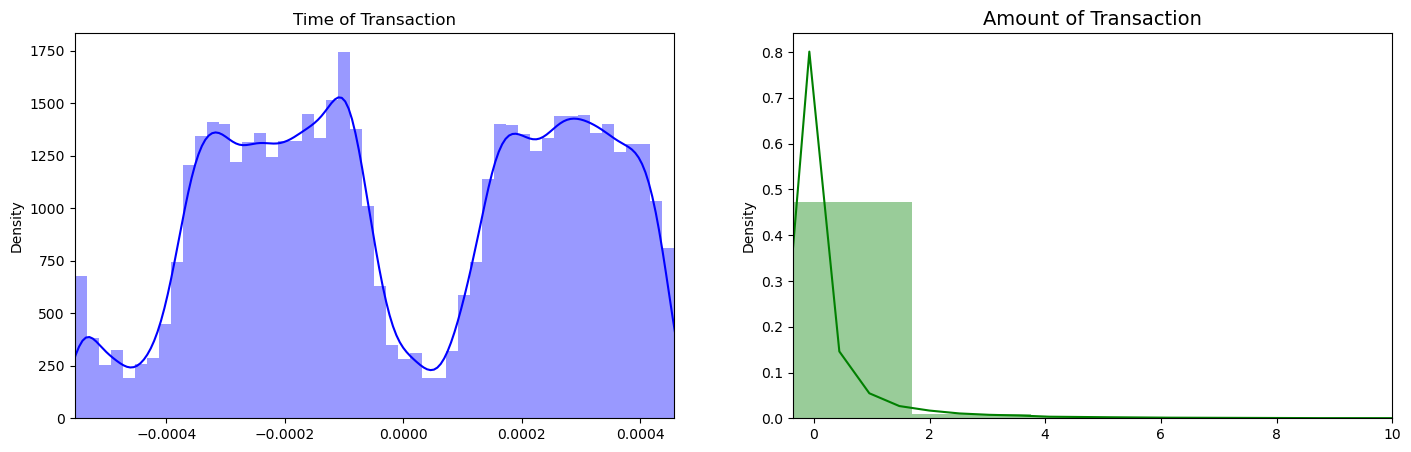

In [27]:
import seaborn as seabplots

fig, ax = plots.subplots(1, 2, figsize=(17,5))

# Plot the distribution of 'Time' feature 
seabplots.distplot(ccdata['Time'].values/(60*60), color='b', ax=ax[0])
ax[0].set_title('Time of Transaction', fontsize=12)
ax[0].set_xlim([min(ccdata['Time'].values/(60*60)), max(ccdata['Time'].values/(60*60))])

seabplots.distplot(ccdata['Amount'].values, ax=ax[1], color='g')
ax[1].set_title('Amount of Transaction', fontsize=14)
ax[1].set_xlim([min(ccdata['Amount'].values),10])

plots.show()

## Checking the Skewness

In [28]:
#columns
cols = ccdata.columns

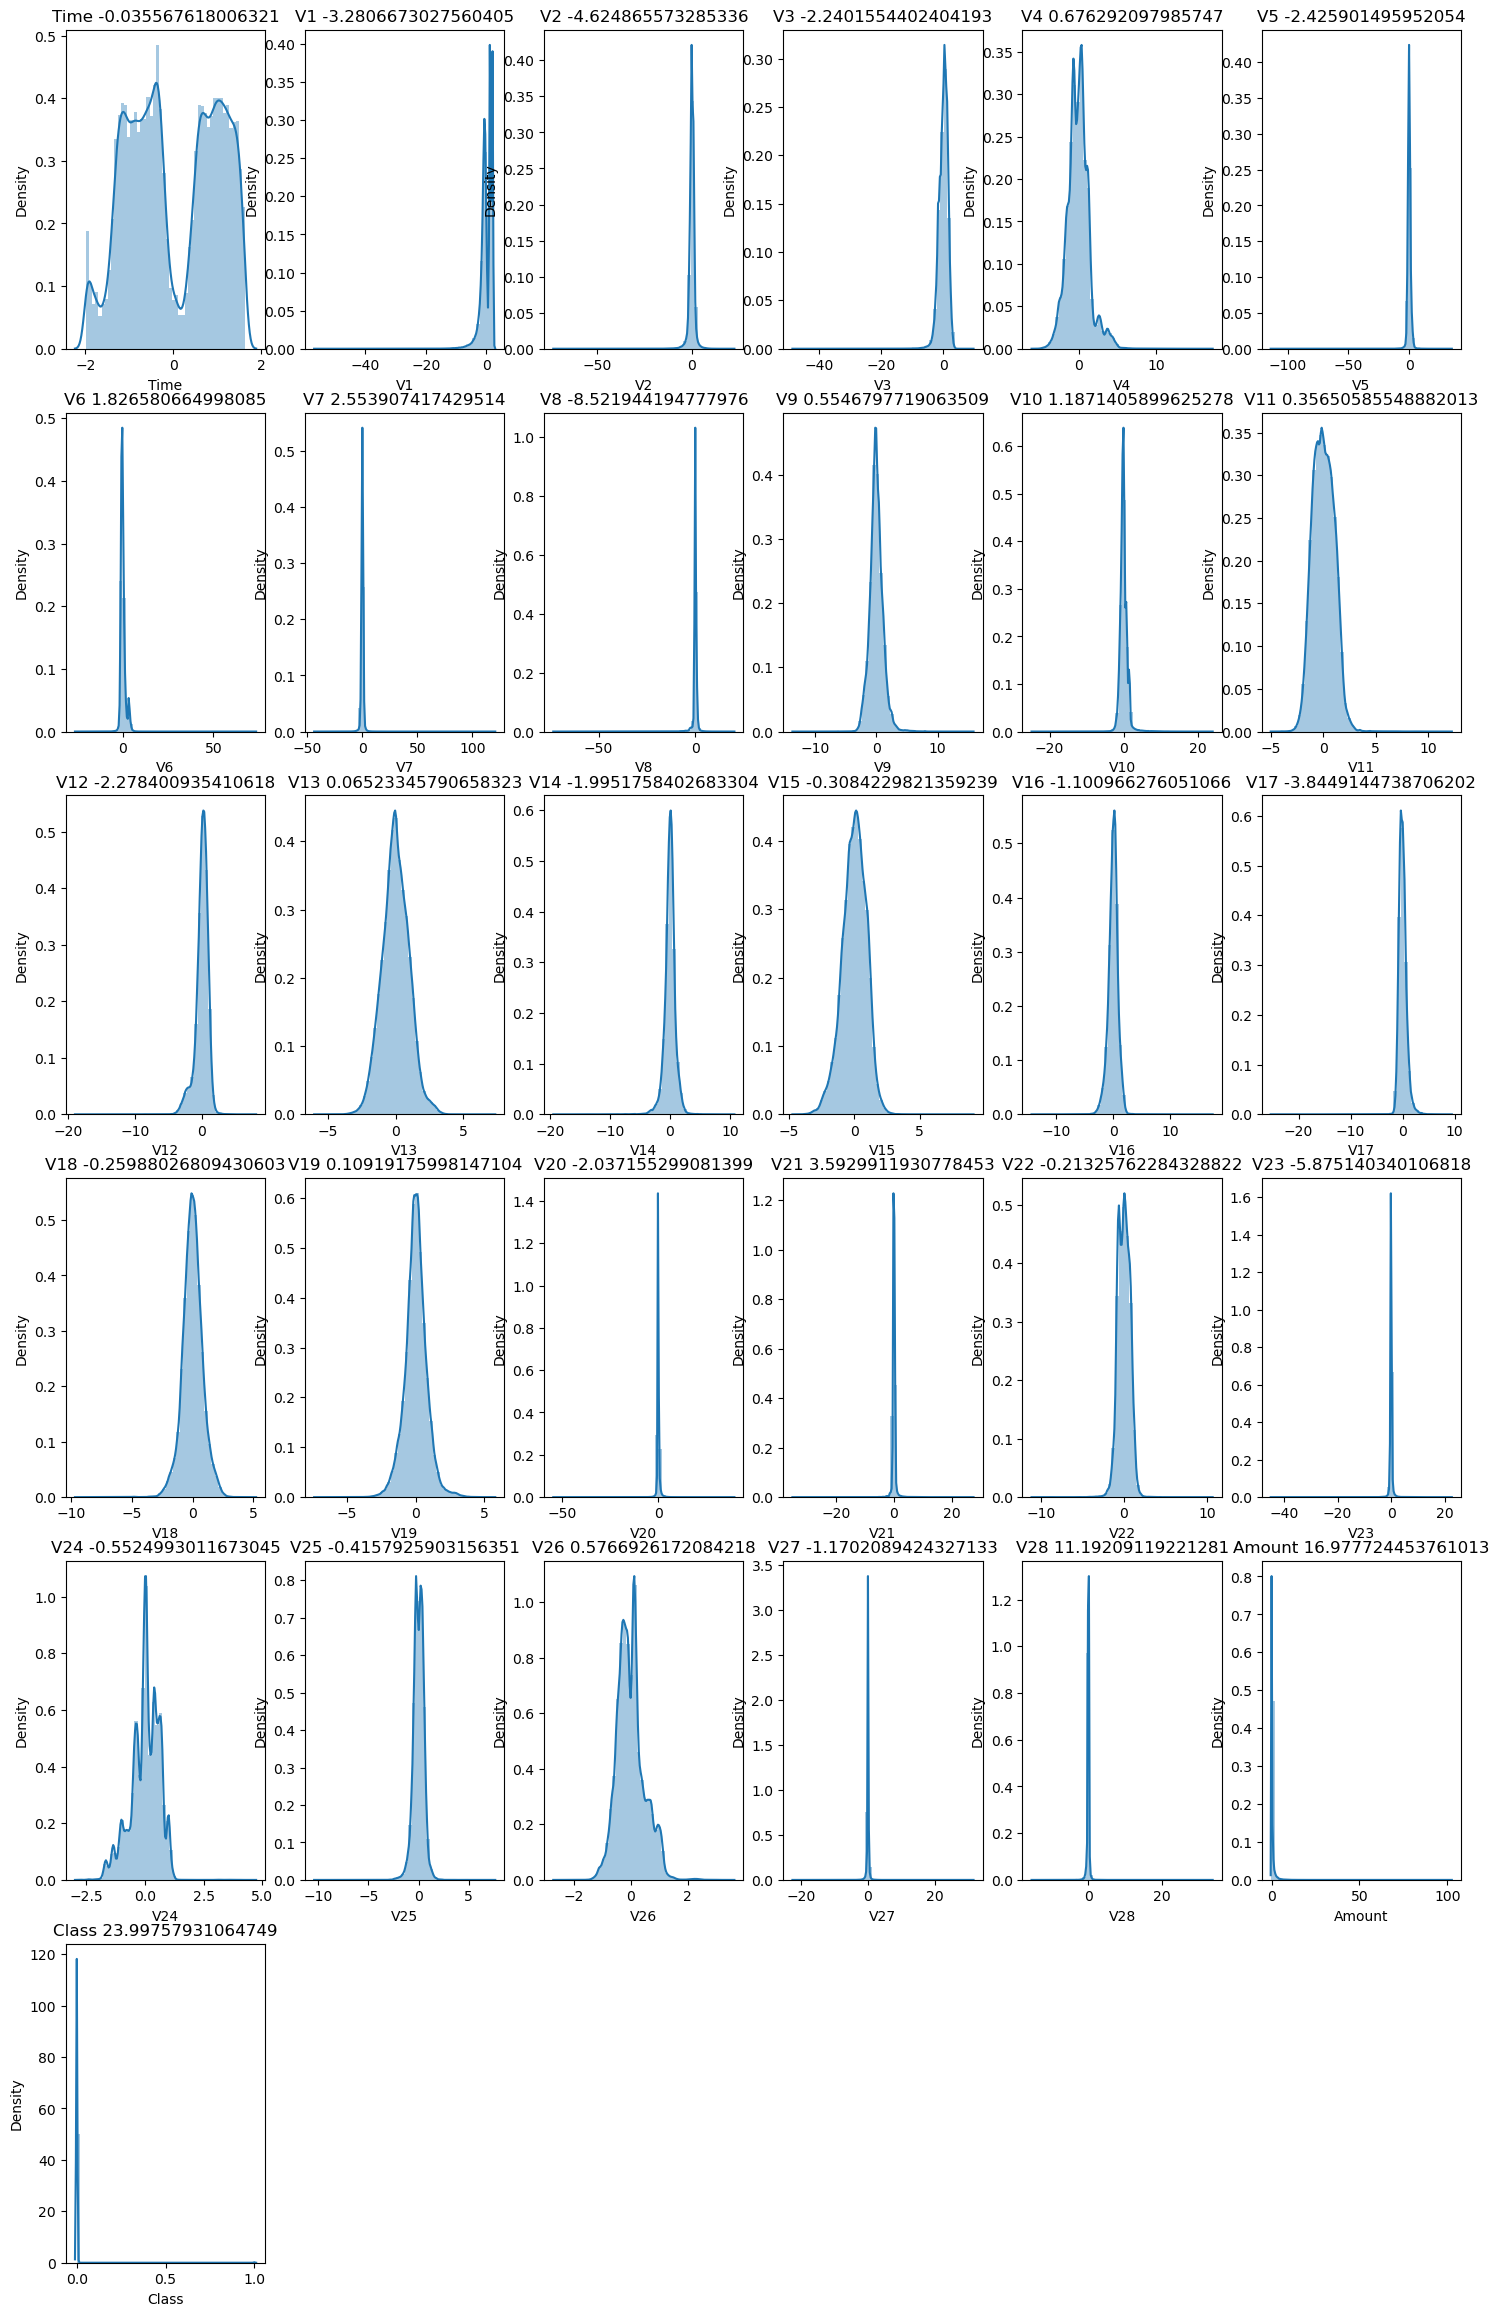

In [29]:
# Checking the skewness in all columns
m=0
plots.figure(figsize=(18,29))
for colums in cols :    
    m=m+1
    plots.subplot(6, 6,m)    
    seabplots.distplot(ccdata[colums])
    plots.title(colums+' '+str(ccdata[colums].skew()))

There are a lot of skewed variables, as we can see. Only those variables that need to be brought into a normal distribution will have their skewness reduced.

#### Reduce Skewness with Power Transformer

In [30]:
#Using Power Transformer

from sklearn.preprocessing import PowerTransformer


powerT = PowerTransformer(method='yeo-johnson', copy=False, standardize=True)


In [31]:
# Fit and transform the Power Transformer on training data
ccdata[cols] = powerT.fit_transform(ccdata)

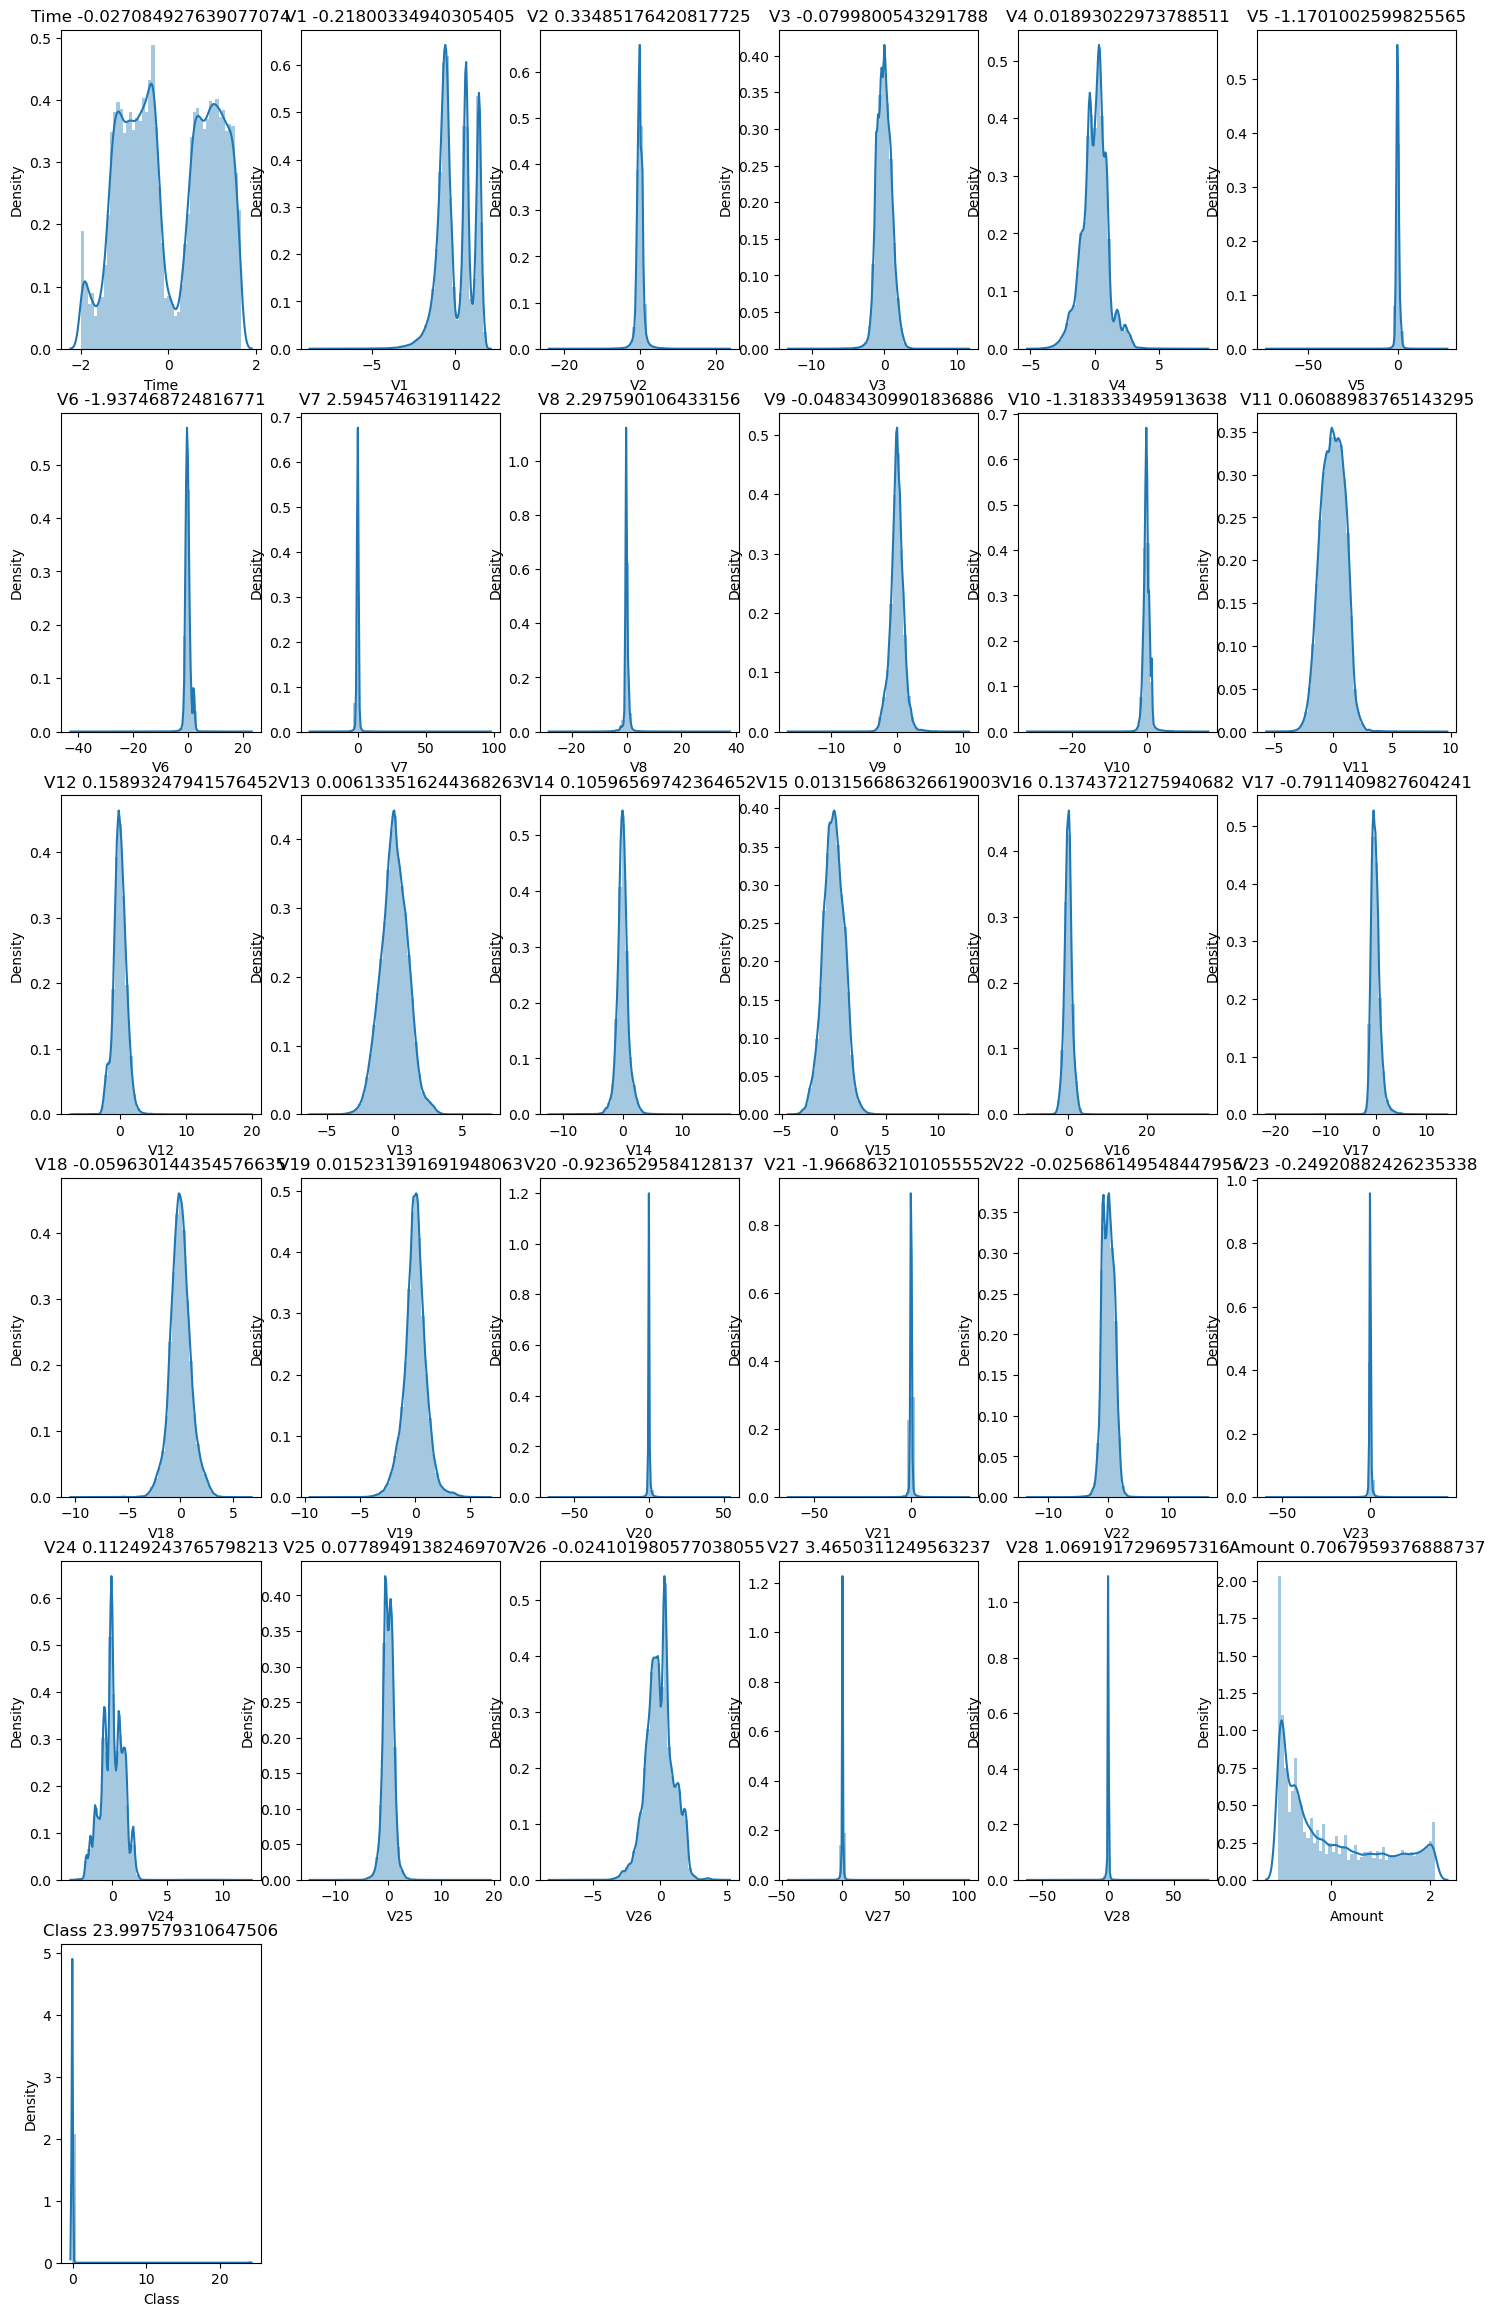

In [32]:
 
# Checking the skewness in all columns
m=0
plots.figure(figsize=(18,29))
for colums in cols :    
    m=m+1
    plots.subplot(6, 6,m)    
    seabplots.distplot(ccdata[colums])
    plots.title(colums+' '+str(ccdata[colums].skew()))

In [33]:
ccdata4 = ccdata.drop(columns = ['Class'])   # drop non numerical columns

In [34]:
data5 = pd.concat([ccdata4,ccdata3],axis=1)
#Using Data5 as the final dataset to train the model and predict

# Balancing Unbalanced Class

We will test a number of methods for controlling data imbalance as we can see that creditcard dataset is severely out of balance.

Undersampling: In this case, the number of non-fraudulent transactions will be lowered to 492 in order to balance the distribution of classes (similar count of fraudulent transctions)

Oversampling: In this case, we will count both fraudulent and non-fraudulent transactions equally.

Undersampling over Oversampling

Because our data is so severely out of balance, we are undersampling the data. In contrast to the 492 fraudulent transactions, there were 284315 non-fraudulent transactions. Undersampling is a much superior strategy in order to obtain the ideal and desired result since if we oversample our data, the inclusion of over 284000 dummy components would undoubtedly effect our results by a significant margin and it will be greatly skewed as non-fradulant.

In [35]:
fraud_array_indices = npy.array(data5[data5.Class == 1].index)
no_records_fraud = len(fraud_array_indices)
print(no_records_fraud)

492


# Undersampling

In [36]:
legit_indices = data5[data5.Class == 0].index

In [37]:
random_legit_indices = npy.random.choice(legit_indices, no_records_fraud, replace=False)
random_legit_indices = npy.array(random_legit_indices)
print(len(random_legit_indices))

492


In [38]:
under_sample_data_indices = npy.concatenate([fraud_array_indices,random_legit_indices])
print(len(under_sample_data_indices))

984


In [39]:
undersample_data = data5.iloc[under_sample_data_indices,:]

## Training and Testing Data Split

In [40]:
X_offeatures = undersample_data.drop(['Class'], inplace=False,axis=1) 
y_ofclass = undersample_data[['Class']] 

In [41]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_testing = train_test_split(X_offeatures,y_ofclass, test_size = 0.33, random_state=45)

In [42]:
#Function to plot Roc-Auc Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plots.figure(figsize=(5, 5))
    plots.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plots.plot([0, 1], [0, 1], 'k--')
    plots.xlim([0.0, 1.0])
    plots.ylim([0.0, 1.05]) 
    plots.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plots.ylabel('True Positive Rate')
    plots.title('Receiver operating characteristic')
    plots.legend(loc="lower right")
    plots.show()

    return None


In [43]:
# Impoting metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Naive Bayes Algorithm 

In [44]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()

In [45]:
naivebayes.fit(A_train,b_train)

GaussianNB()

### Prediction on Training 

In [46]:
b_pred_naive = naivebayes.predict(A_train)

In [47]:
print("Accuracy of Gaussian Naive Bayes: ",metrics.accuracy_score(b_train, b_pred_naive))

Accuracy of Gaussian Naive Bayes:  0.928679817905918


In [48]:
#Matrix
confumatrix_nb = metrics.confusion_matrix(b_train, b_pred_naive)
print(confumatrix_nb)

[[320   8]
 [ 39 292]]


#### Cross Validation Score 

In [49]:
scores = cross_val_score(naivebayes, A_train, b_train) 
print("Model Accuracy with Cross Validation is:",scores.mean() * 100)

Model Accuracy with Cross Validation is: 92.8649086282674


In [50]:
print(classification_report(b_train,b_pred_naive))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       328
           1       0.97      0.88      0.93       331

    accuracy                           0.93       659
   macro avg       0.93      0.93      0.93       659
weighted avg       0.93      0.93      0.93       659



<Axes: >

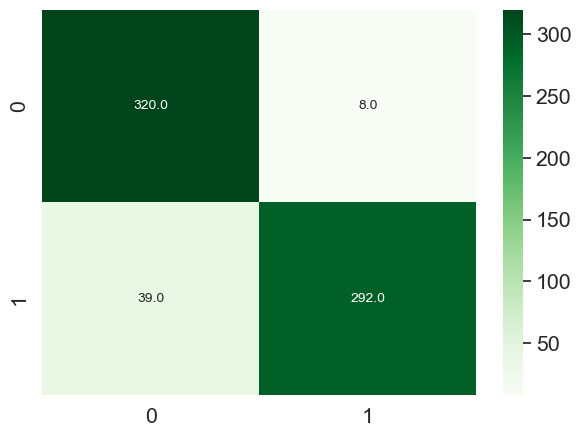

In [51]:
confmatrix = confusion_matrix(b_train, b_pred_naive)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f", annot=True)

In [52]:
#
x= npy.sqrt(metrics.mean_squared_error(b_train, b_pred_naive))
print('Root Mean Squared Error:',x )

Root Mean Squared Error: 0.26705838705062596


In [53]:
# Predicting Prob
b_train_proba_naive = naivebayes.predict_proba(A_train)[:,1]

# Area **
auc = metrics.roc_auc_score(b_train, b_train_proba_naive)
auc

0.9661318252155331

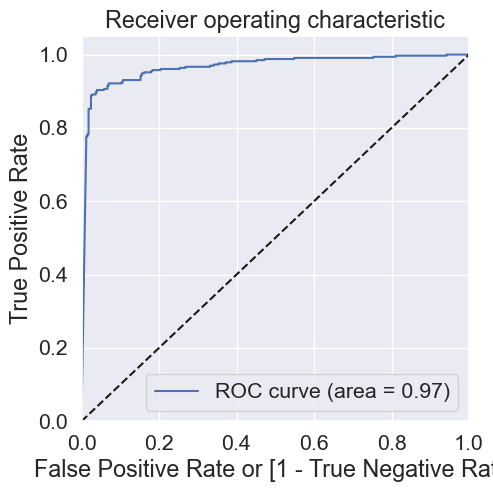

In [54]:
# Plotting the ROC curve
draw_roc(b_train, b_train_proba_naive)

### Prediction on Testing Set 

In [55]:
# Predictions on the test set
b_pred_naive2 = naivebayes.predict(A_test)
print("Accuracy:-",metrics.accuracy_score(b_testing, b_pred_naive2))

Accuracy:- 0.9015384615384615


In [56]:
# Matrix
confu_mat_naive = metrics.confusion_matrix(b_testing, b_pred_naive2)
print(confu_mat_naive)

[[160   4]
 [ 28 133]]


<Axes: >

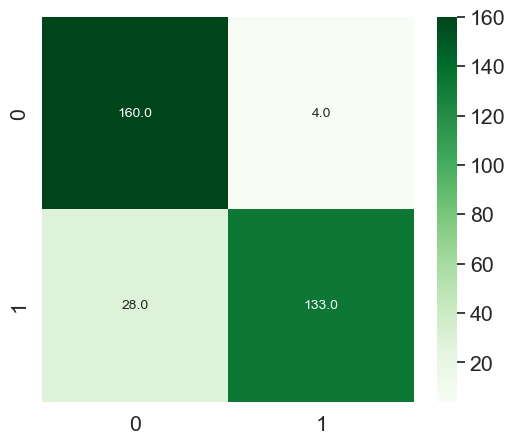

In [57]:
# Confusion matrix figure
matrix = confusion_matrix(b_testing, b_pred_naive2)


# Make the plot
plots.figure(figsize=(6,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [58]:
print(classification_report(b_testing,b_pred_naive2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       164
           1       0.97      0.83      0.89       161

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.91      0.90      0.90       325



In [59]:
#
y= npy.sqrt(metrics.mean_squared_error(b_testing, b_pred_naive2))
print('Root Mean Squared Error:', y)

Root Mean Squared Error: 0.31378581622109447


In [60]:
# Predicted prob
b_testing_proba_naive = naivebayes.predict_proba(A_test)[:,1]

In [61]:
# roc_auc
auc = metrics.roc_auc_score(b_testing, b_testing_proba_naive)
auc

0.9526586880775639

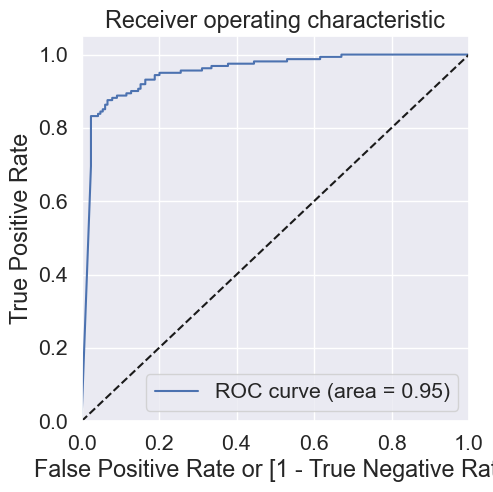

In [62]:
# Showing  the ROC curve
draw_roc(b_testing, b_testing_proba_naive)

#  Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1

LogisticRegression()

In [64]:
model1.fit(A_train,b_train)

LogisticRegression()

##  Prediction on training set

In [65]:
b_train_pred_LR = model1.predict(A_train)

In [66]:
print("Accuracy:-",metrics.accuracy_score(b_train, b_train_pred_LR))

Accuracy:- 0.9635811836115327


In [67]:
# Confusion matrix
confu_mat_LR = metrics.confusion_matrix(b_train, b_train_pred_LR)
print(confu_mat_LR)

[[323   5]
 [ 19 312]]


<Axes: >

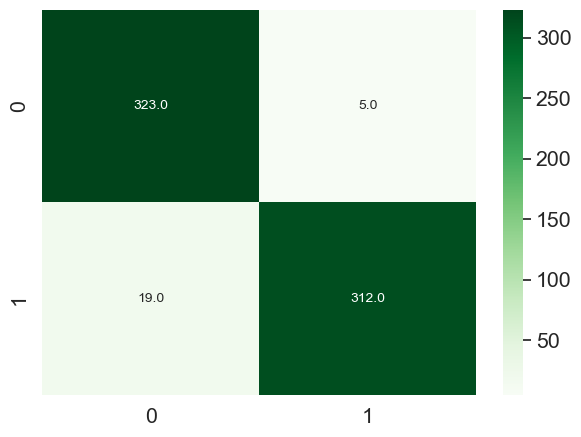

In [68]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_train, b_train_pred_LR)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [69]:
#

scores = cross_val_score(model1, A_train, b_train) 
print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 94.23664122137406


In [70]:
print(classification_report(b_train,b_train_pred_LR))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       328
           1       0.98      0.94      0.96       331

    accuracy                           0.96       659
   macro avg       0.96      0.96      0.96       659
weighted avg       0.96      0.96      0.96       659



In [71]:
#
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train, b_train_pred_LR)))

Root Mean Squared Error: 0.19083714624901352


In [72]:
b_train_pred_proba_LR = model1.predict_proba(A_train)[:,1]

In [73]:
# roc_auc
auc_LR = metrics.roc_auc_score(b_train, b_train_pred_proba_LR)
auc_LR

0.9923826541890798

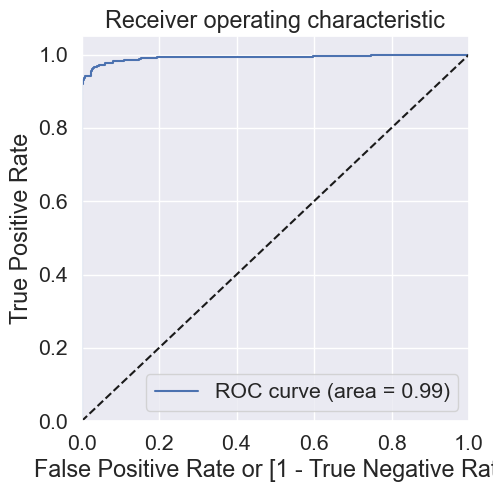

In [74]:
# Plot the ROC curve
draw_roc(b_train, b_train_pred_proba_LR)

## Prediction on testing set 

In [75]:
probs_lr = model1.predict_proba(A_test)

In [76]:
b_testing_pred_lr = model1.predict(A_test)

In [77]:
print("Accuracy:-",metrics.accuracy_score(b_testing, b_testing_pred_lr))

Accuracy:- 0.9353846153846154


In [78]:
# Confusion matrix
confu_mat_lr = metrics.confusion_matrix(b_testing, b_testing_pred_lr)
print(confu_mat_lr)

[[157   7]
 [ 14 147]]


<Axes: >

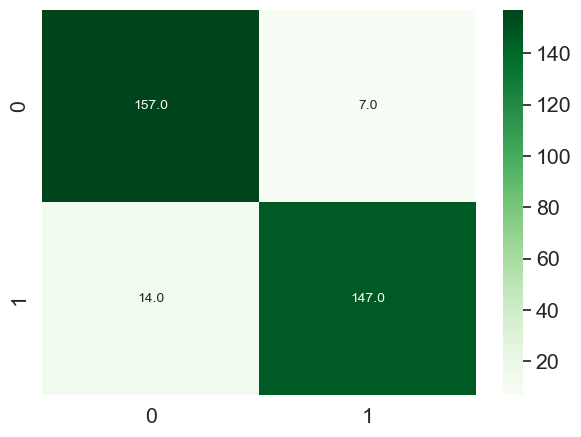

In [79]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_testing_pred_lr)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [80]:
print(classification_report(b_testing,b_testing_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       164
           1       0.95      0.91      0.93       161

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325



In [81]:
#
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_testing_pred_lr)))

Root Mean Squared Error: 0.254195563720897


In [82]:
# Predicted probability
b_testing_pred_proba_lr = model1.predict_proba(A_test)[:,1]

In [83]:
# roc_auc
auc_lr = metrics.roc_auc_score(b_testing, b_testing_pred_proba_lr)
auc_lr

0.9709513710043932

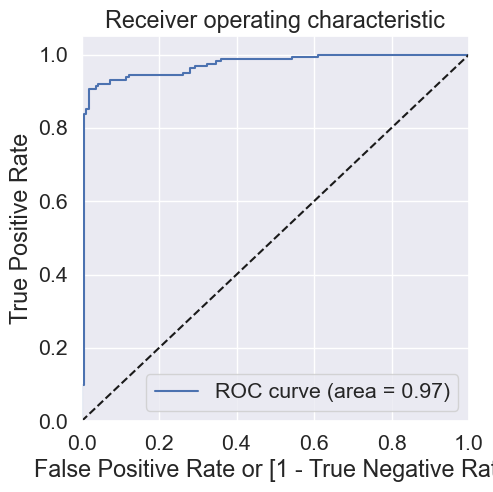

In [84]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_lr)

# Random Forest

In [85]:
# Impoting metrics
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [86]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(A_train, b_train)

RandomForestClassifier()

### Prediction on training set

In [89]:
# Predictions on the train set
b_train_pred_rf = rf.predict(A_train)

In [90]:
print("Accuracy:-",metrics.accuracy_score(b_train, b_train_pred_rf))

Accuracy:- 1.0


In [91]:
# Confusion matrix
confu_mat = metrics.confusion_matrix(b_train, b_train_pred_rf)
print(confu_mat)


[[328   0]
 [  0 331]]


In [92]:

scores = cross_val_score(rf, A_train, b_train) 
print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 93.6271108026833


In [93]:
print(classification_report(b_train,b_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       331

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659



<Axes: >

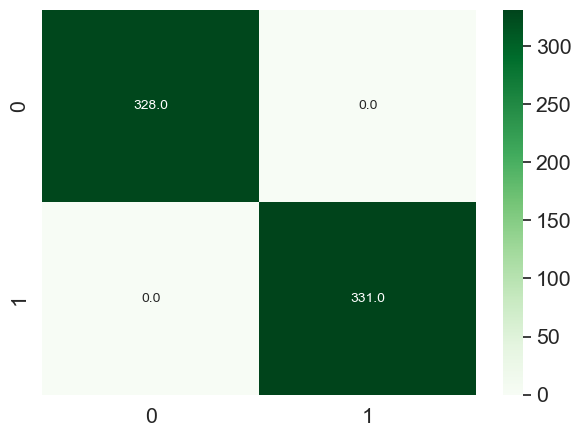

In [94]:
#Confusion Matrix Figure
confmatrix = confusion_matrix(b_train, b_train_pred_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [95]:
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train, b_train_pred_rf)))

Root Mean Squared Error: 0.0


In [96]:
# Predicted probability
b_train_pred_proba = rf.predict_proba(A_train)[:,1]

In [97]:
# roc_auc
auc = metrics.roc_auc_score(b_train, b_train_pred_proba)
auc

1.0000000000000002

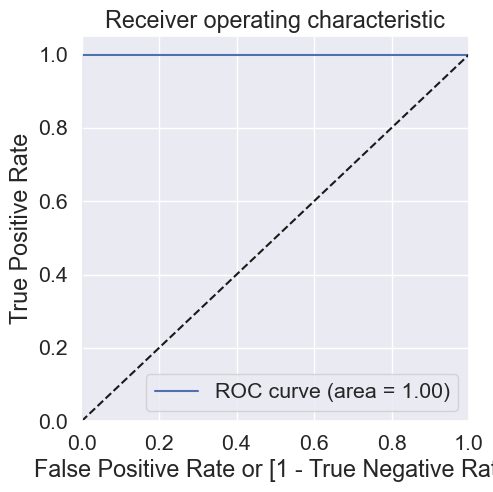

In [98]:
# Plot the ROC curve
draw_roc(b_train, b_train_pred_proba)

### Prediction on testing set

In [99]:
# Predictions on the train set
b_testing_pred_rf = rf.predict(A_test)

In [100]:
print("Accuracy:-",metrics.accuracy_score(b_testing, b_testing_pred_rf))

Accuracy:- 0.9446153846153846


In [101]:
# Confusion matrix
confu_mat_rf = metrics.confusion_matrix(b_testing, b_testing_pred_rf)
print(confu_mat_rf)

[[161   3]
 [ 15 146]]


<Axes: >

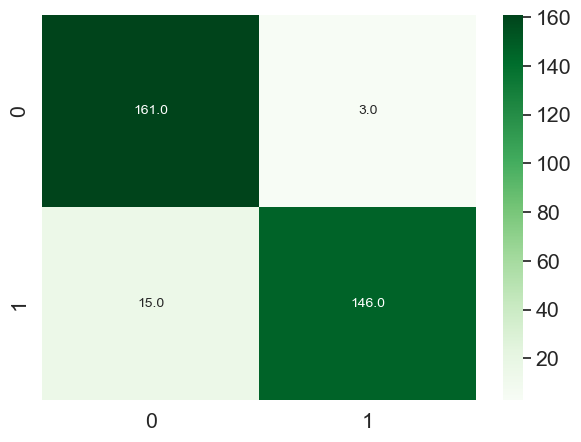

In [102]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_testing_pred_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [103]:
print(classification_report(b_testing,b_testing_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       164
           1       0.98      0.91      0.94       161

    accuracy                           0.94       325
   macro avg       0.95      0.94      0.94       325
weighted avg       0.95      0.94      0.94       325



In [104]:
#
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_testing_pred_rf)))

Root Mean Squared Error: 0.23533936216582085


In [105]:
# Predicted probability
b_testing_pred_proba_rf = rf.predict_proba(A_test)[:,1]

In [106]:
# roc_auc
auc = metrics.roc_auc_score(b_testing, b_testing_pred_proba_rf)
auc


0.9783176791395244

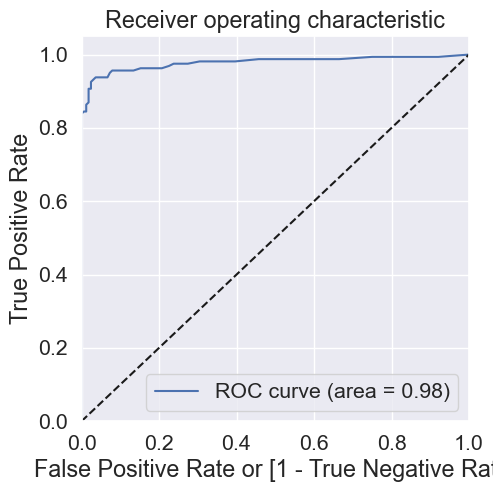

In [107]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_rf)

# Oversampling

In [108]:
data5.sample(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
280355,1.57813,1.374749,-0.357544,-0.354358,0.423673,-0.578711,-0.35272,-0.506133,-0.110695,1.356927,...,0.265446,1.054356,0.16012,-0.257049,-0.211309,-0.360137,0.084747,-0.107665,-0.732187,0


In [109]:
X = data5.drop(['Class'],axis=1, inplace=False) 
y = data5['Class']

In [110]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_testing = train_test_split(X,y, test_size = 0.33, random_state=42)

In [111]:
# Importing oversampler library
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [112]:

# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
A_train_ros, b_train_ros = ros.fit_resample(A_train, b_train)

In [113]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(b_train))
# new class distribution 
print('New class distribution:-',Counter(b_train_ros))

Before sampling class distribution:- Counter({0: 190477, 1: 343})
New class distribution:- Counter({0: 190477, 1: 190477})


In [114]:
A_train_ros.shape

(380954, 30)

In [115]:
b_train_ros.shape

(380954,)

# Naive Bayes Algorithm

In [116]:
from sklearn.naive_bayes import GaussianNB
naivebayes1 = GaussianNB()

In [117]:
naivebayes1.fit(A_train_ros,b_train_ros)

GaussianNB()

### Prediction on testing

In [118]:
b_pred_naive_over = naivebayes1.predict(A_train_ros)

print("Accuracy:-",metrics.accuracy_score(b_train_ros, b_pred_naive_over))

Accuracy:- 0.9141129900197924


In [119]:
# Confusion matrix
confu_mat4 = metrics.confusion_matrix(b_train_ros, b_pred_naive_over)
print(confu_mat4)

[[185434   5043]
 [ 27676 162801]]


<Axes: >

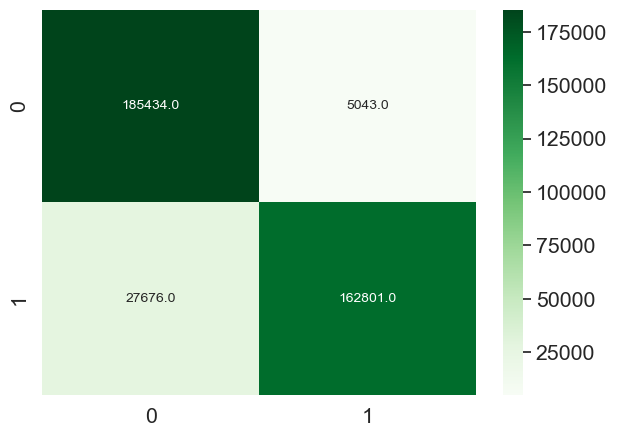

In [120]:
#Confusion Matrix Figure
confmatrix = confusion_matrix(b_train_ros, b_pred_naive_over)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [121]:
# Cross Validation Score

#

scores = cross_val_score(naivebayes1, A_train_ros, b_train_ros) 
print("Accuracy of Model with Cross Validation is:",scores.mean() * 100)

Accuracy of Model with Cross Validation is: 91.32414901105751


In [122]:
print(classification_report(b_train_ros, b_pred_naive_over))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92    190477
           1       0.97      0.85      0.91    190477

    accuracy                           0.91    380954
   macro avg       0.92      0.91      0.91    380954
weighted avg       0.92      0.91      0.91    380954



In [123]:
#
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train_ros, b_pred_naive_over)))

Root Mean Squared Error: 0.293064856269406


In [124]:
# Predicted probability
b_train_pred_proba_naive2 = naivebayes.predict_proba(A_train_ros)[:,1]

# roc_auc
auc2 = metrics.roc_auc_score(b_train_ros, b_train_pred_proba_naive2)
auc2

0.9584534313320215

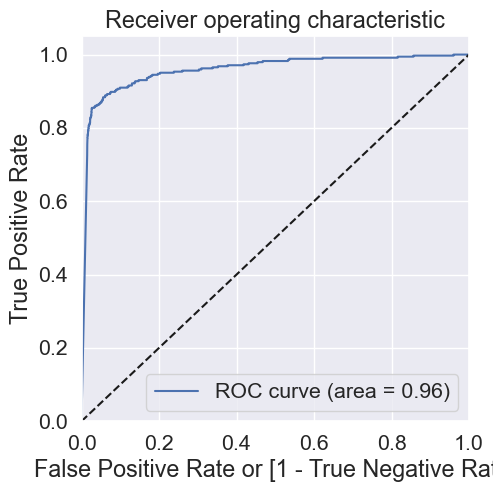

In [125]:
# Plot the ROC curve
draw_roc(b_train_ros, b_train_pred_proba_naive2)

### Prediction on Testing 

In [126]:
# Predictions on the test set
b_pred_naive22 = naivebayes.predict(A_test)
print("Accuracy:-",metrics.accuracy_score(b_testing, b_pred_naive22))

Accuracy:- 0.969644738102078


In [127]:
# Confusion matrix
confu_mat_naive2 = metrics.confusion_matrix(b_testing, b_pred_naive22)
print(confu_mat_naive2)

[[91002  2836]
 [   17   132]]


<Axes: >

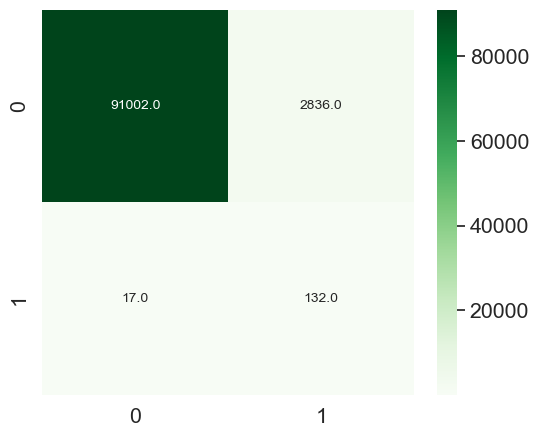

In [128]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_pred_naive22)


# Make the plot
plots.figure(figsize=(6,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [129]:
print(classification_report(b_testing,b_pred_naive22))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     93838
           1       0.04      0.89      0.08       149

    accuracy                           0.97     93987
   macro avg       0.52      0.93      0.53     93987
weighted avg       1.00      0.97      0.98     93987



In [130]:
#
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_pred_naive22)))

Root Mean Squared Error: 0.17422761519897487


In [131]:
# Predicted probability
b_testing_pred_proba_naive2 = naivebayes1.predict_proba(A_test)[:,1]

In [132]:
# roc_auc
auc = metrics.roc_auc_score(b_testing, b_testing_pred_proba_naive2)
auc

0.9653853327975915

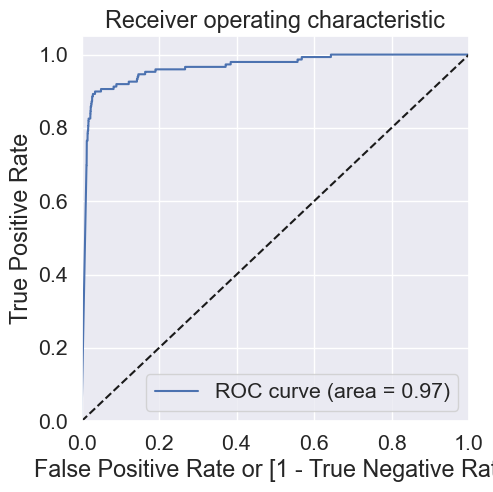

In [133]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_naive2)

# Logistic Regression


In [134]:
from sklearn.linear_model import LogisticRegression
model_over_lr = LogisticRegression()
model_over_lr

LogisticRegression()

In [135]:
model_over_lr.fit(A_train_ros,b_train_ros)

LogisticRegression()

### Prediction on Training set

In [136]:
b_train_pred_over_LR = model_over_lr.predict(A_train_ros)

In [137]:
print("Accuracy:-",metrics.accuracy_score(b_train_ros, b_train_pred_over_LR))

Accuracy:- 0.9473558487376429


In [138]:
# Confusion matrix
confu_mat_over_LR = metrics.confusion_matrix(b_train_ros, b_train_pred_over_LR)
print(confu_mat_over_LR)

[[185408   5069]
 [ 14986 175491]]


<Axes: >

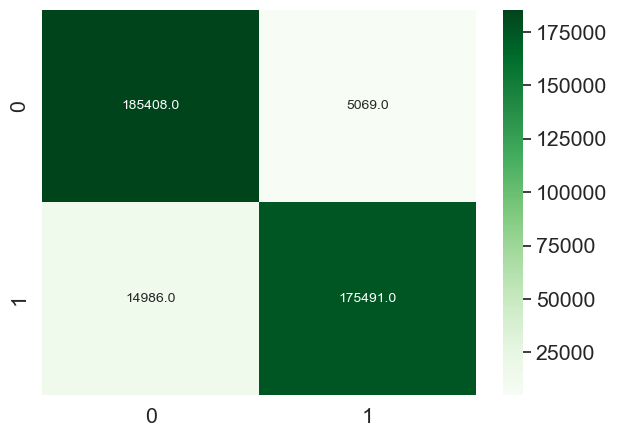

In [139]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_train_ros, b_train_pred_over_LR)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [140]:
#

scores_ros = cross_val_score(model_over_lr, A_train_ros, b_train_ros) 
print("Accuracy of Model with Cross Validation is:",scores_ros.mean() * 100)

Accuracy of Model with Cross Validation is: 94.79280935272352


In [141]:
print(classification_report(b_train_ros,b_train_pred_over_LR))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    190477
           1       0.97      0.92      0.95    190477

    accuracy                           0.95    380954
   macro avg       0.95      0.95      0.95    380954
weighted avg       0.95      0.95      0.95    380954



In [142]:
#

print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train_ros,b_train_pred_over_LR)))

Root Mean Squared Error: 0.22944313295968816


In [143]:
b_train_pred_proba_LR2 = model_over_lr.predict_proba(A_train_ros)[:,1]

# roc_auc
auc_LR3 = metrics.roc_auc_score(b_train_ros, b_train_pred_proba_LR2)
auc_LR3

0.9876111575733844

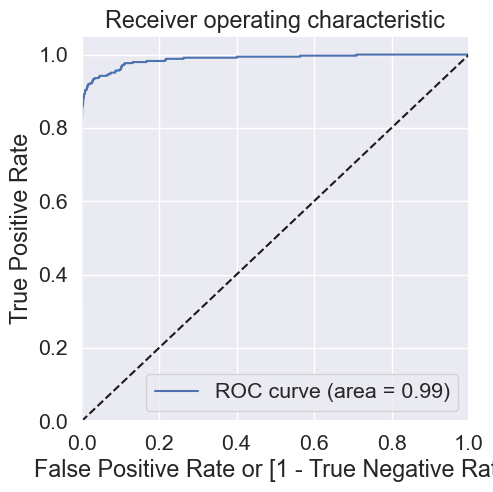

In [144]:
# Plot the ROC curve
draw_roc(b_train_ros, b_train_pred_proba_LR2)

Prediction on Testing

In [145]:
b_testing_pred_over_LR = model_over_lr.predict(A_test)

In [146]:
print("Accuracy:-",metrics.accuracy_score(b_testing, b_testing_pred_over_LR))

Accuracy:- 0.9727515507463799


In [147]:
# Confusion matrix
confusionmatriA_test_lr = metrics.confusion_matrix(b_testing, b_testing_pred_over_LR)
print(confusionmatriA_test_lr)

[[91288  2550]
 [   11   138]]


<Axes: >

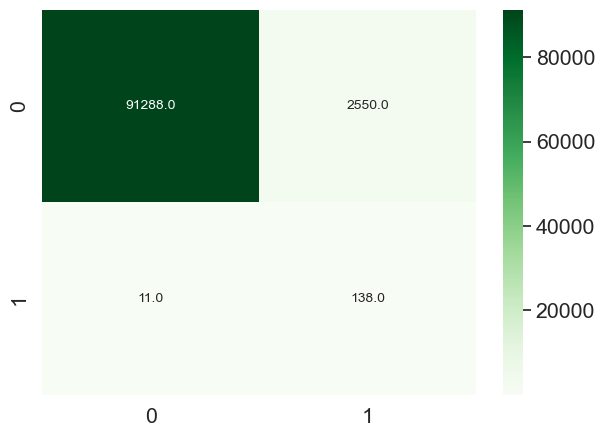

In [148]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_testing_pred_over_LR)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [149]:
print(classification_report(b_testing,b_testing_pred_over_LR))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93838
           1       0.05      0.93      0.10       149

    accuracy                           0.97     93987
   macro avg       0.53      0.95      0.54     93987
weighted avg       1.00      0.97      0.98     93987



In [150]:
#
  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_testing_pred_over_LR)))

Root Mean Squared Error: 0.16507104305001583


In [151]:
# Predicted probability
b_testing_pred_proba_lr2 = model_over_lr.predict_proba(A_test)[:,1]

# roc_auc
auc_lr2 = metrics.roc_auc_score(b_testing, b_testing_pred_proba_lr2)
auc_lr2

0.9818355023100643

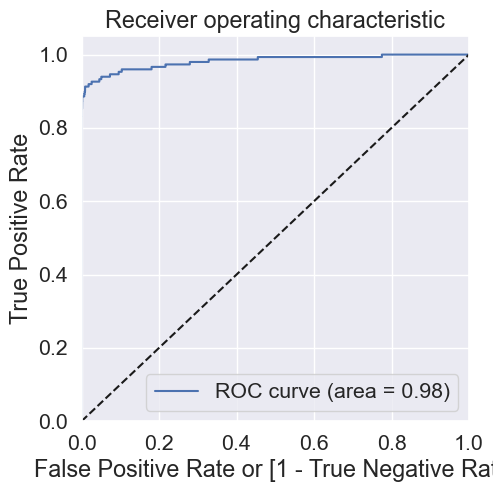

In [152]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_lr2)

# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model_over_rf = RandomForestClassifier()
model_over_rf

RandomForestClassifier()

In [155]:
model_over_rf.fit(A_train_ros,b_train_ros)

RandomForestClassifier()

# Training

In [156]:
b_train_pred_over_rf = model_over_rf.predict(A_train_ros)

In [157]:
print("Accuracy:-",metrics.accuracy_score(b_train_ros, b_train_pred_over_rf))

Accuracy:- 1.0


In [158]:
# Confusion matrix
confu_mat_over_rf = metrics.confusion_matrix(b_train_ros, b_train_pred_over_rf)
print(confu_mat_over_rf)

[[190477      0]
 [     0 190477]]


In [159]:
#Cross validation

scores_ros = cross_val_score(model_over_rf, A_train_ros, b_train_ros) 
print("Accuracy of Model with Cross Validation is:",scores_ros.mean() * 100)

Accuracy of Model with Cross Validation is: 99.99553751345293


In [160]:
print(classification_report(b_train_ros,b_train_pred_over_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       1.00      1.00      1.00    190477

    accuracy                           1.00    380954
   macro avg       1.00      1.00      1.00    380954
weighted avg       1.00      1.00      1.00    380954



<Axes: >

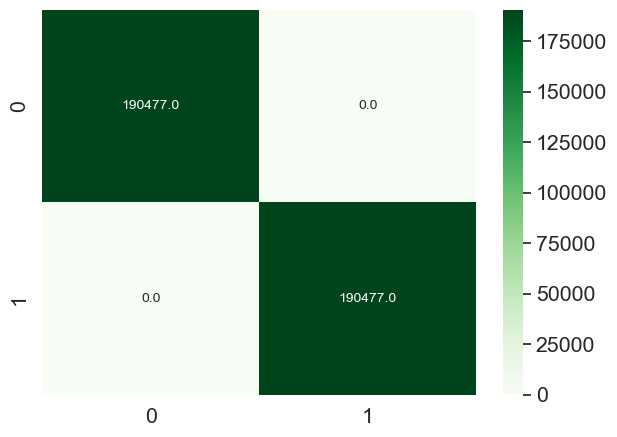

In [161]:
#Confusion Matrix Figure
confmatrix = confusion_matrix(b_train_ros, b_train_pred_over_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(confmatrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [162]:
#

print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_train_ros,b_train_pred_over_rf)))

Root Mean Squared Error: 0.0


In [163]:
# Predicted probability
b_train_pred_over_proba = rf.predict_proba(A_train_ros)[:,1]

# roc_auc
auc_over = metrics.roc_auc_score(b_train_ros, b_train_pred_over_proba)
auc_over

0.9930465542985702

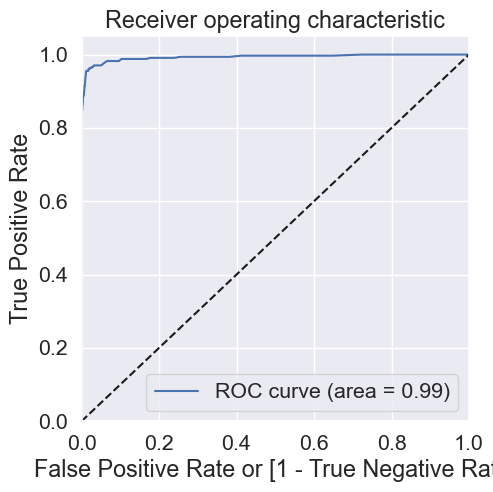

In [164]:
# Plot the ROC curve
draw_roc(b_train_ros, b_train_pred_over_proba)

# Testing

In [165]:
b_testing_pred_over_rf = model_over_rf.predict(A_test)

In [166]:
print("Accuracy:-",metrics.accuracy_score(b_testing, b_testing_pred_over_rf))

Accuracy:- 0.9996382478427868


In [167]:
# Confusion matrix
confu_mat_over_rf = metrics.confusion_matrix(b_testing, b_testing_pred_over_rf)
print(confu_mat_over_rf)

[[93833     5]
 [   29   120]]


<Axes: >

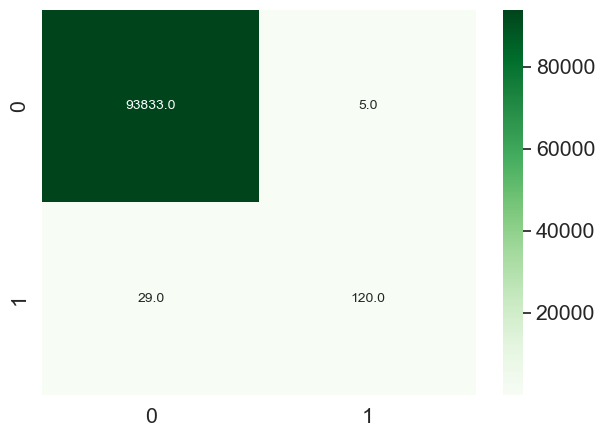

In [168]:
#Confusion Matrix Figure
matrix = confusion_matrix(b_testing, b_testing_pred_over_rf)


# Make the plot
plots.figure(figsize=(7,5))
seabplots.set(font_scale=1.4)
seabplots.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plots.cm.Greens, fmt = ".1f")

In [169]:
print(classification_report(b_testing,b_testing_pred_over_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.96      0.81      0.88       149

    accuracy                           1.00     93987
   macro avg       0.98      0.90      0.94     93987
weighted avg       1.00      1.00      1.00     93987



In [170]:
 
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(b_testing, b_testing_pred_over_rf)))

Root Mean Squared Error: 0.019019783311416343


In [171]:
# Predicted probability
b_testing_pred_proba_over_rf = rf.predict_proba(A_test)[:,1]

In [172]:
# roc_auc
auc_rf_over = metrics.roc_auc_score(b_testing, b_testing_pred_proba_over_rf)
auc_rf_over

0.9885110438080422

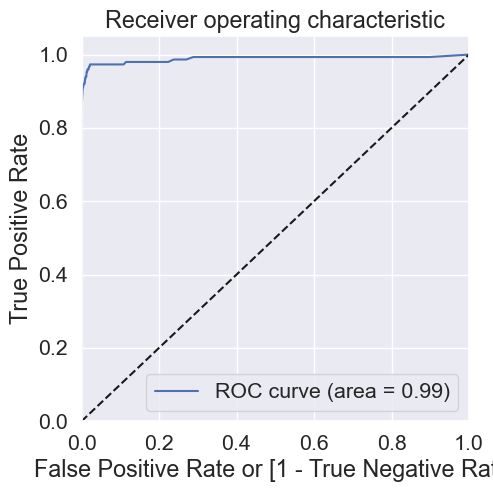

In [173]:
# Plot the ROC curve
draw_roc(b_testing, b_testing_pred_proba_over_rf)